# Performance & Approximation Evaluator

Interactive benchmarking and visualization of graph Laplacian cost functions.

### 1. Import Libraries

In [ ]:
import sys
import os
import logging
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from basis.laplacian.objectives import (
    laplacian_cost,
    laplacian_cost_approx_by_triangle_inequality,
    laplacian_cost_approx_by_median_split,
    laplacian_cost_approx_by_majority,
    laplacian_cost_approx_by_mean_split,
)

from src.basis.tools.benchmark import benchmark_and_evaluate
from src.basis.tools.plotting import (
    plot_performance,
    plot_output_distributions,
    plot_error_distributions,
    plot_time_vs_error,
)

## 2. Parameters

- `NUM_VERTICES`: Number of nodes in the graph.
- `NUM_TRIALS`: Number of trials for averaging.
- `NUM_PARTITIONS`: Number of evaluated partition matrices for each trial. They are gnerated randomly and are repeated for each trial.
- `SEED`: Random seed for reproducibility.
- `SHOW_GRAPHS`: Whether to show the generated graphs. By default, the graphs are not shown.
- `IS_WEIGHTED`: Whether the graph is weighted or not. By default the graph is unweighted.
- `SHOW_PROGRESS`: Whether to show the progress of the trials. By default the progress is shown.
- `SAVE_FIG_PATH`: Path to save the generated figures. If not specified, the figures are not saved.
- `BASELINE_NAME`: Name of the baseline method to be used for comparison.

In [ ]:
# Parameters
NUM_VERTICES   = 100
NUM_TRIALS     = 8
NUM_PARTITIONS = 100
SEED           = None
SHOW_GRAPH     = False
IS_WEIGHTED    = False
SHOW_PROGRESS  = True
SAVE_FIG_PATH  = "../plots/figures/"
BASELINE_NAME  = "original"

## Evaluation of the performance of the Laplacian cost functios

  For each partition matrix, the following cost functions are evaluated:
  - `original`: Original Laplacian cost function.
  - `triangle`: An upper bound derived from the triangle inequality.
  - `median-split`: An approximation based on the median of the input values.
  - `mean-split`: An approximation based on the mean of the input values.
  - `majority`: An approximation based on weighted heuristic.

*Note: Each cost function is scalable by a predefined factor which is set to 1.0 by default. If you want to change the scaling factor, you can do so by modifying the `scaling_factors` dictionary in the code.*

In [15]:
# Define objective functions
funcs = {
    "original": laplacian_cost,
    "triangle": laplacian_cost_approx_by_triangle_inequality,
    "median-split": laplacian_cost_approx_by_median_split,
    "mean-split": laplacian_cost_approx_by_mean_split,
    "majority": laplacian_cost_approx_by_majority,
}
# Scaling factors for the approximations
scaling_factors = {
    "triangle": 1,
    "majority": 1,
    "mean-split": 1,
    "median-split": 1,
}
# Run
times_dict, outputs_dict = benchmark_and_evaluate(
    funcs, NUM_VERTICES, NUM_TRIALS, SHOW_PROGRESS, SEED, SHOW_GRAPH, IS_WEIGHTED, NUM_PARTITIONS, scaling=None
)
# Summarize results
orig = times_dict.get(BASELINE_NAME, [])
if orig:
    print(f"Original timing: μ={np.mean(orig):.2e}s, min={np.min(orig):.2e}s, max={np.max(orig):.2e}s")


2025-05-17 18:17:10,150 [INFO] Starting benchmark: N=300, trials=8, partitions=100
2025-05-17 18:17:10,151 [INFO] Trial 1/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 753.02it/s]
2025-05-17 18:17:11,722 [INFO] Trial 2/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 792.63it/s]
2025-05-17 18:17:13,490 [INFO] Trial 3/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 830.34it/s]
2025-05-17 18:17:15,186 [INFO] Trial 4/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 951.16it/s]
2025-05-17 18:17:16,848 [INFO] Trial 5/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 919.16it/s]
2025-05-17 18:17:18,532 [INFO] Trial 6/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 821.97it/s]
2025-05-17 18:17:20,434 [INFO] Trial 7/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 741.55it/s]
2025-05-17 18:17:22,227 [INFO] Trial 8/8
Partitions: 100%|██████████| 100/100 [00:00<00:00, 801.28it/s]
2025-05-17 18:17:23,957 [INFO] Avg eval times: {'original': np.float64(0.011870333240

Original timing: μ=1.19e-02s, min=9.74e-03s, max=1.42e-02s


## Plotting

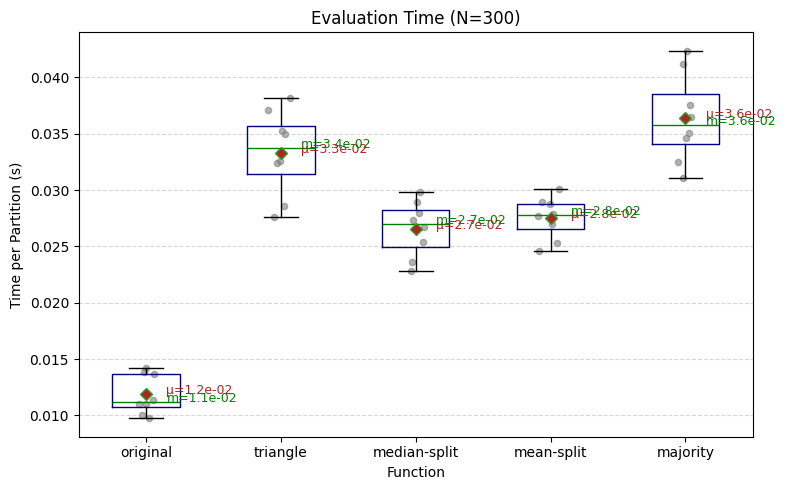

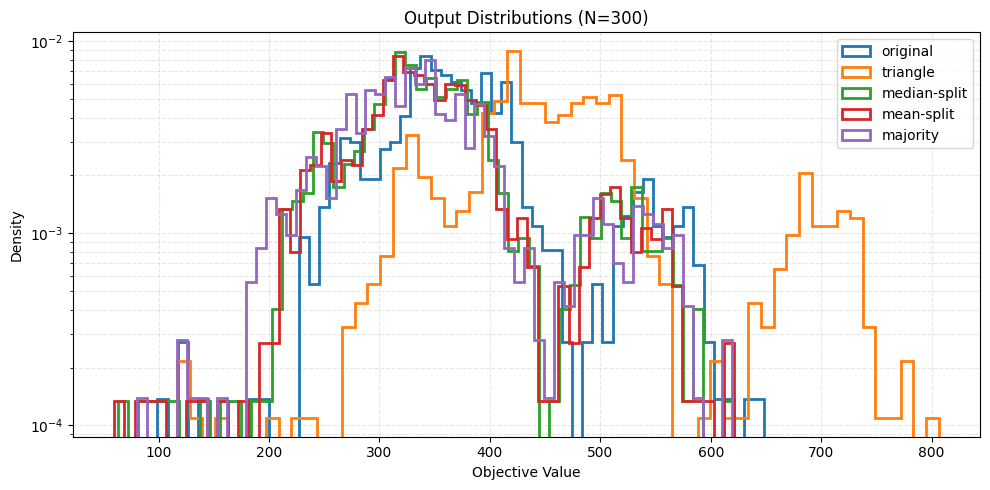

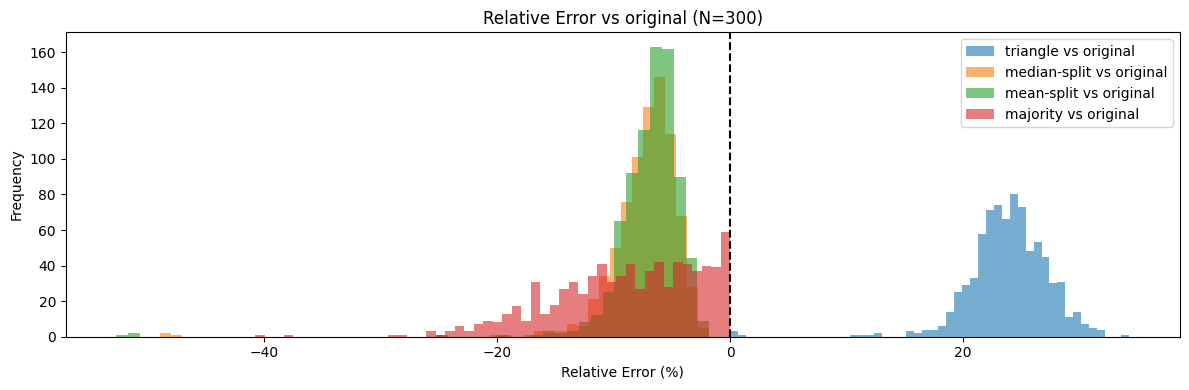

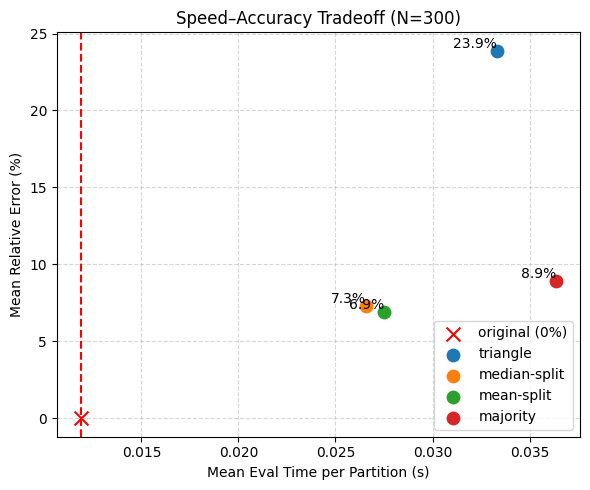

In [16]:
# Create the save_path if it doesn't exist
if SAVE_FIG_PATH and not os.path.exists(SAVE_FIG_PATH):
    os.makedirs(SAVE_FIG_PATH)
# Logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s"
)
file_name = os.path.join(SAVE_FIG_PATH, f"performance.pdf")
plot_performance(times_dict, NUM_VERTICES, file_name=file_name)
file_name = os.path.join(SAVE_FIG_PATH, f"output_distributions.png")
plot_output_distributions(outputs_dict, NUM_VERTICES, file_name=file_name)
file_name = os.path.join(SAVE_FIG_PATH, f"error_distributions.png")
plot_error_distributions(outputs_dict, BASELINE_NAME, NUM_VERTICES, file_name=file_name)
file_name = os.path.join(SAVE_FIG_PATH, f"time_vs_error.png")
plot_time_vs_error(times_dict, outputs_dict, BASELINE_NAME, NUM_VERTICES, file_name=file_name)